<a href="https://colab.research.google.com/github/MorawoLekanDavid/ML_projects/blob/main/flood_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = 'https://raw.githubusercontent.com/MorawoLekanDavid/ML_projects/main/datasets/flood.csv'
df = pd.read_csv(dataset)
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

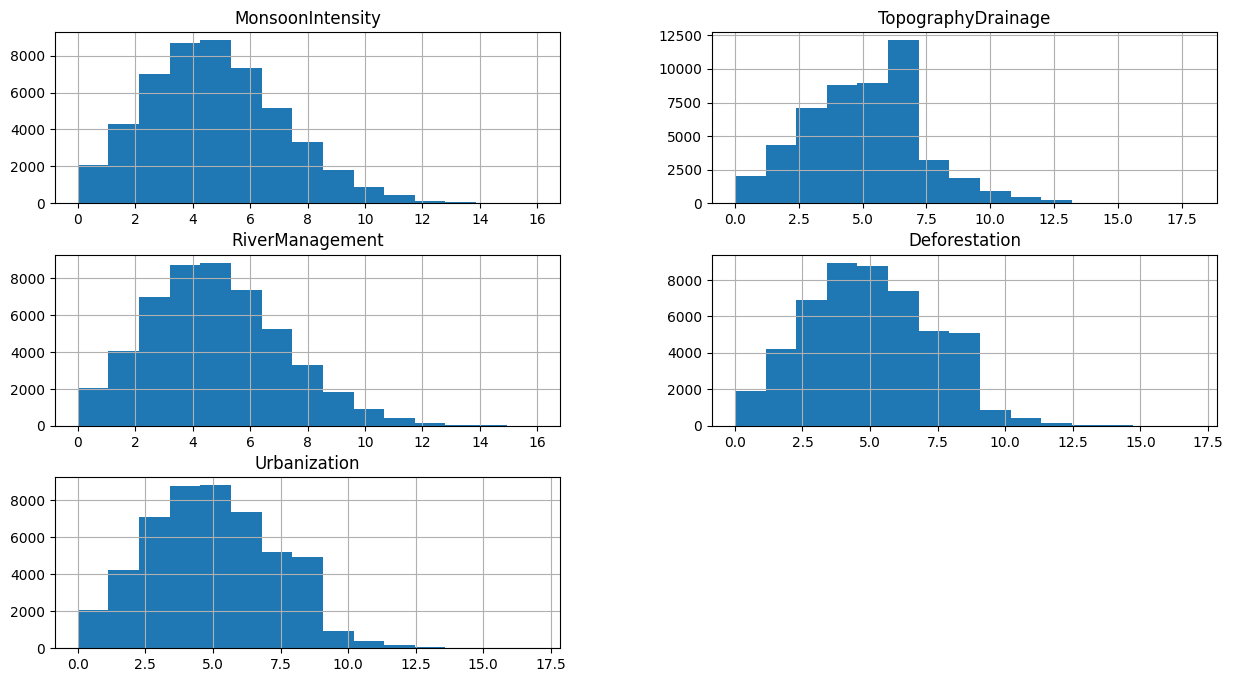

In [ ]:
import matplotlib.pyplot as plt
attr = df.columns
df[attr[:5]].hist(bins =15, figsize = (15, 8))
plt.show()


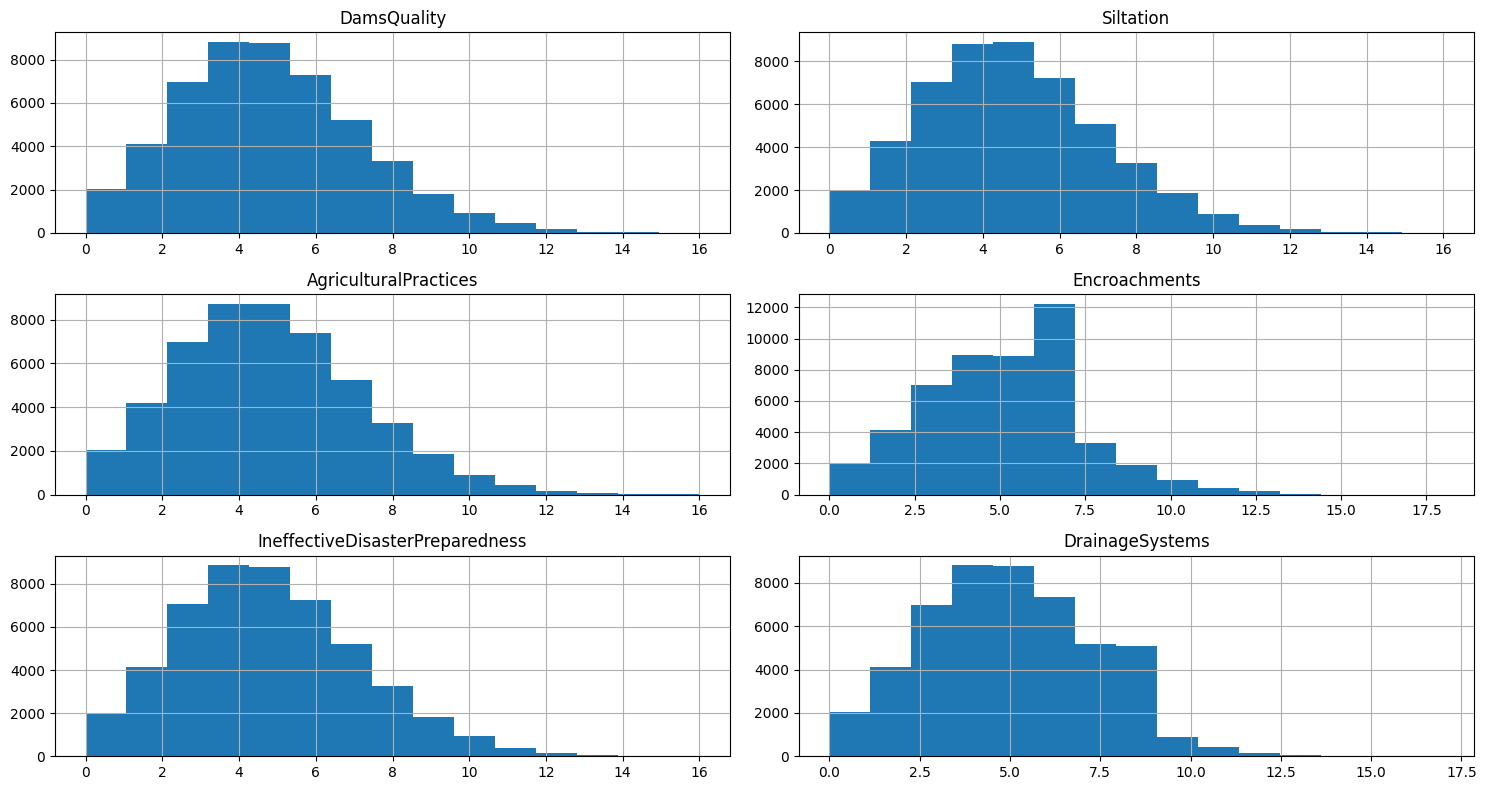

In [ ]:
import matplotlib.pyplot as plt
attr = df.columns
df[attr[6:12]].hist(bins =15, figsize = (15, 8))
plt.tight_layout()
plt.show()

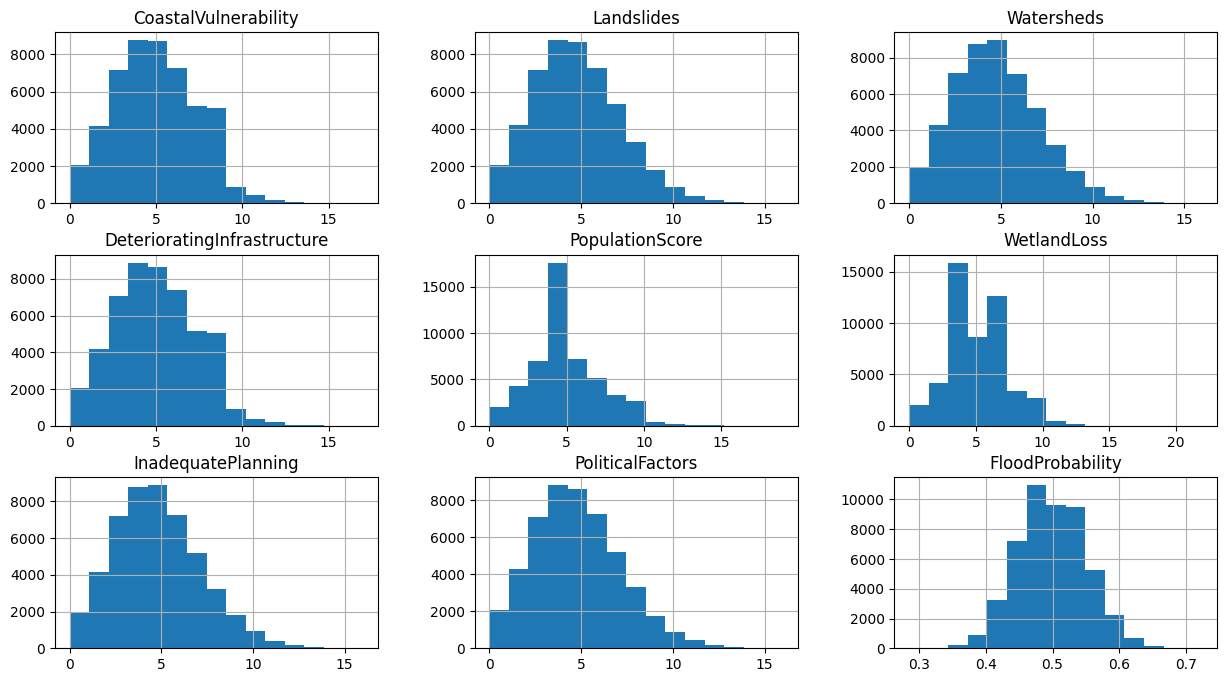

In [ ]:
import matplotlib.pyplot as plt
attr = df.columns
df[attr[12:]].hist(bins =15, figsize = (15, 8))
plt.show()


In [ ]:
corr_matrix = df.corr()
corr_matrix["FloodProbability"].sort_values(ascending = False)

,FloodProbability
FloodProbability,1.000000
DeterioratingInfrastructure,0.229444
TopographyDrainage,0.229414
RiverManagement,0.228917
Watersheds,0.228152
DamsQuality,0.227467
PopulationScore,0.226928
Siltation,0.226544
IneffectiveDisasterPreparedness,0.225126
PoliticalFactors,0.225009


In [ ]:
df.duplicated().value_counts()

,count
False,50000


In [ ]:
X = df.drop(columns='FloodProbability', axis=1)
y = df['FloodProbability']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [ ]:

# Using custom transformer to detect outliers and replace the outliers with the median
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
import numpy as np

# Custom transformer to replace outliers with the median
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, factor=3):  # Factor defines the boundary of the outlier on Z-table
        self.factor = factor

    def fit(self, X, y=None):
        # Compute the median for each feature
        self.median_ = np.median(X, axis=0)
        return self

    def transform(self, X):
        z_scores = np.abs(stats.zscore(X))  # Replace df with your DataFrame
        X_out = np.where((z_scores > self.factor), self.median_, X)
        return X_out


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pre_pipeline = make_pipeline(OutlierRemover(), StandardScaler())

In [ ]:
from sklearn.compose import ColumnTransformer
num_columns = df.select_dtypes(include=['int64']).columns.drop('FloodProbability', errors = 'ignore')
preprocessor = ColumnTransformer(
    transformers = [
        ('num', pre_pipeline,num_columns)
    ]
)
x_train_encoded = preprocessor.fit_transform(X_train)

In [ ]:
num_feature_names = num_columns
# Creating the DataFrame
X_train_encoded = pd.DataFrame(x_train_encoded, columns=num_feature_names, index=X_train.index)

# Check the transformed DataFrame
X_train_encoded.head()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
39087,-0.898141,-0.895666,0.479205,-1.379917,0.950297,-0.440116,0.015623,0.956458,-0.446724,0.478565,-0.446944,0.013400,-0.900746,0.024500,-0.431140,-0.901204,1.414479,-0.907288,-0.441086,0.019540
30893,0.022593,0.022801,0.479205,0.016277,-0.436897,-0.440116,0.476829,2.810193,-0.446724,0.478565,-1.373518,0.936764,-1.361774,-0.438849,-1.358172,1.414385,1.414479,-0.445246,-1.828768,0.019540
45278,0.943326,-0.895666,-0.448992,0.016277,1.412695,0.023384,0.476829,-0.433844,0.473526,0.478565,0.016342,0.013400,-1.822802,-1.828896,1.886441,0.951267,-0.896101,1.402920,-0.441086,0.938002
16398,0.482959,-0.436433,0.015106,0.481675,-1.361693,-0.903615,-1.367993,0.493024,-2.287225,0.940981,0.016342,0.013400,0.943368,1.877896,-0.431140,0.488149,-1.358216,0.478837,-0.441086,0.938002
13653,0.482959,0.022801,0.015106,-0.914519,-1.361693,-1.367115,-0.445582,-0.433844,0.933652,-0.446266,0.016342,-0.909963,0.482339,-1.365547,-0.894656,0.951267,0.028131,0.016795,-1.366208,-0.898922


In [ ]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Defining the regressors
voting_reg = VotingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(random_state=42)),
        ('dt', DecisionTreeRegressor(random_state = 42))
    ]
)
x_test_encoded = preprocessor.fit_transform(X_test)
X_test_encoded = pd.DataFrame(x_test_encoded, columns=num_feature_names, index=X_test.index)
X_test_encoded

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
33553,0.940069,-0.884868,-0.462151,-0.453367,0.028326,0.496358,-1.370783,0.005601,0.019666,-0.439625,0.471610,0.497582,-0.444146,0.490846,0.017077,-0.441295,-1.370755,0.008447,0.022035,-0.885707
9427,-0.445578,0.964676,0.906780,-0.917930,0.028326,0.963605,-0.000320,-1.382968,0.949495,0.470572,-0.911411,-0.899205,0.014114,0.029134,1.878378,-1.360947,2.341890,-0.914736,-1.378524,-0.424209
199,-1.369343,-0.884868,-0.918461,-0.453367,0.028326,-0.438138,0.913322,0.931313,-1.375078,-0.894724,1.393625,1.428774,0.930635,0.029134,0.017077,-1.360947,-0.442594,0.008447,0.955741,-0.885707
12447,0.016304,-0.422482,-0.005841,0.940322,1.416850,-1.372634,-0.000320,0.005601,0.019666,1.380769,-0.450404,0.497582,-1.360666,-0.894290,-0.448248,0.018531,0.021487,-1.376327,-0.911671,-0.424209
39489,-0.907461,1.889448,-0.005841,-0.917930,-0.897357,-0.438138,0.456501,1.857025,-2.304907,0.015473,-1.372418,0.031986,0.930635,-1.356002,0.482402,0.018531,1.413729,-0.914736,0.022035,-0.885707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,-0.907461,-0.422482,-0.462151,-0.917930,0.028326,-0.438138,-0.000320,-0.457256,0.019666,0.470572,-0.450404,0.963178,0.472375,-0.432578,0.017077,-0.901121,1.877809,-1.837919,0.022035,1.421782
25079,0.940069,-1.347254,0.906780,0.475759,-1.823039,-1.372634,-0.457141,-0.457256,-0.445249,1.380769,0.010603,0.031986,0.930635,0.029134,-0.913573,0.478357,-0.442594,1.393222,2.356300,0.498787
18707,0.940069,-0.884868,-0.462151,-0.917930,0.491167,-0.438138,0.456501,-0.920112,-0.445249,1.380769,-0.911411,-1.364801,0.472375,0.029134,2.343703,0.478357,0.485567,0.008447,0.022035,0.037289
15200,0.016304,-0.884868,-0.462151,0.011196,0.491167,0.029110,0.456501,-0.920112,0.019666,0.925670,-0.450404,0.497582,-0.902406,1.875982,-1.844223,0.478357,2.805970,0.008447,1.889447,0.498787


In [ ]:
# Fit the Voting Regressor on the training data
voting_reg.fit(X_train_encoded, y_train)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('dt', DecisionTreeRegressor(random_state=42))])

In [ ]:
# Print the score of the VotingRegressor
print(f"Voting Regressor score = {voting_reg.score(X_test_encoded, y_test)}")
# Loop through each estimator in the Voting Regressor and print individual scores
for name, clf in voting_reg.named_estimators_.items():
    print(f"{name} score = {clf.score(X_test_encoded, y_test)}")

Voting Regressor score = 0.7563913507141846
lr score = 0.934553336190145
rf score = 0.6930631529477129
dt score = 0.04664294093930221


In [ ]:
# Predict using the Voting Regressor
voting_predictions = voting_reg.predict(X_test_encoded[:1])
print("Voting Regressor Prediction:", voting_predictions)

# Predict using individual estimators
individual_predictions = [clf.predict(X_test_encoded[:1]) for clf in voting_reg.estimators_]
print("Individual Estimator Predictions:", individual_predictions)

# Scoring the Voting Regressor on the test set
score = voting_reg.score(X_test_encoded, y_test)
print("Voting Regressor Score:", score)

Voting Regressor Prediction: [0.4734543]
Individual Estimator Predictions: [array([0.4587129]), array([0.47665]), array([0.485])]
Voting Regressor Score: 0.7563913507141846
